# Pass Maps and Heat Maps of various players for Spain in Euro 2024 final

In [118]:
#importing libraries
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

# Loading Competition, Match and Event Data

In [119]:
#call statsbomb API to get all free competitions
free_comps = sb.competitions()
free_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [120]:
#for Euro 2024 competition_id = 55 and season_id = 282
euro_24_matches = sb.matches(competition_id = 55, season_id = 282)
euro_24_matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,...,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


In [121]:
#team we're going to look
team = 'Spain'
matches_df = euro_24_matches[(euro_24_matches['home_team']==team)|(euro_24_matches['away_team']== team)]
matches_df = matches_df.sort_values(by='match_date',ascending = False)
matches_df.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
8,3942226,2024-07-05,19:00:00.000,Europe - UEFA Euro,2024,Spain,Germany,2,1,available,...,2024-07-13T03:52:43.383929,5,Quarter-finals,MHPArena,Anthony Taylor,Luis de la Fuente Castillo,Julian Nagelsmann,1.1.0,2,2
15,3941018,2024-06-30,22:00:00.000,Europe - UEFA Euro,2024,Spain,Georgia,4,1,available,...,2024-07-12T06:08:12.572176,4,Round of 16,RheinEnergieStadion,François Letexier,Luis de la Fuente Castillo,Willy Sagnol,1.1.0,2,2
18,3930179,2024-06-24,22:00:00.000,Europe - UEFA Euro,2024,Albania,Spain,0,1,available,...,2024-07-01T06:07:22.418137,3,Group Stage,Merkur Spiel-Arena,Glenn Nyberg,Sylvio Mendes Campos Junior,Luis de la Fuente Castillo,1.1.0,2,2


In [122]:
final_id = matches_df.match_id.iloc[0]
event_df = sb.events(match_id=final_id)
event_df.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Spain,772,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN


In [123]:
event_df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist

In [124]:
#seperate start and end co-ordinates
event_df[['x','y']] = event_df['location'].apply(pd.Series)
event_df[['pass_end_x','pass_end_y']] = event_df['pass_end_location'].apply(pd.Series)
event_df[['carry_end_x','carry_end_y']] = event_df['carry_end_location'].apply(pd.Series)

# Data Manipulation

In [125]:
event_df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Block', 'Dispossessed', 'Duel',
       'Dribble', 'Ball Recovery', 'Clearance', 'Interception',
       'Dribbled Past', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Injury Stoppage', 'Referee Ball-Drop', '50/50',
       'Half End', 'Substitution', 'Shield', 'Tactical Shift', 'Error'],
      dtype=object)

In [126]:
event_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   50_50                           4 non-null      object 
 1   ball_receipt_outcome            107 non-null    object 
 2   ball_recovery_recovery_failure  2 non-null      object 
 3   block_deflection                2 non-null      object 
 4   block_offensive                 1 non-null      object 
 5   block_save_block                1 non-null      object 
 6   carry_end_location              759 non-null    object 
 7   clearance_aerial_won            10 non-null     object 
 8   clearance_body_part             43 non-null     object 
 9   clearance_head                  20 non-null     object 
 10  clearance_left_foot             13 non-null     object 
 11  clearance_right_foot            10 non-null     object 
 12  counterpress                    94

In [158]:
#filter for passes that started outside the final third of the pitch
f3rd_passes = event_df[(event_df.team==team)&(event_df.type=='Pass')&(event_df.pass_end_x>80)&(event_df.pass_outcome.isna())]
f3rd_passes_count = f3rd_passes.groupby('player').size().reset_index()
f3rd_passes_count

,player,0
0,Aymeric Laporte,12
1,Daniel Carvajal Ramos,19
2,Daniel Olmo Carvajal,13
3,Fabián Ruiz Peña,19
4,Lamine Yamal Nasraoui Ebana,12
5,Marc Cucurella Saseta,9
6,Martín Zubimendi Ibáñez,6
7,Mikel Oyarzabal Ugarte,1
8,Nicholas Williams Arthuer,19
9,Robin Aime Robert Le Normand,12


In [128]:
f3rd_passes_count.rename(columns={f3rd_passes_count.columns[1]: "passes" }, inplace = True)
f3rd_passes_count

,player,passes
0,Aymeric Laporte,12
1,Daniel Carvajal Ramos,19
2,Daniel Olmo Carvajal,13
3,Fabián Ruiz Peña,19
4,Lamine Yamal Nasraoui Ebana,12
5,Marc Cucurella Saseta,9
6,Martín Zubimendi Ibáñez,6
7,Mikel Oyarzabal Ugarte,1
8,Nicholas Williams Arthuer,19
9,Robin Aime Robert Le Normand,12


In [129]:
#final third carries for focus team
f3rd_carries = event_df[(event_df.type=="Carry")&(event_df.x<80)&(event_df.carry_end_x>80)&(event_df.team==team)]
f3rd_carries_count = f3rd_carries.groupby('player').size().reset_index()
f3rd_carries_count.rename(columns={f3rd_carries_count.columns[1]: "carries" }, inplace = True)
f3rd_carries_count

,player,carries
0,Aymeric Laporte,3
1,Daniel Olmo Carvajal,2
2,Fabián Ruiz Peña,2
3,Lamine Yamal Nasraoui Ebana,2
4,Martín Zubimendi Ibáñez,3
5,Nicholas Williams Arthuer,1
6,Robin Aime Robert Le Normand,1


In [130]:
progressions_df = pd.merge(f3rd_passes_count, f3rd_carries_count, how="outer",on=["player"])
progressions_df

,player,passes,carries
0,Aymeric Laporte,12,3.0
1,Daniel Carvajal Ramos,19,NaN
2,Daniel Olmo Carvajal,13,2.0
3,Fabián Ruiz Peña,19,2.0
4,Lamine Yamal Nasraoui Ebana,12,2.0
5,Marc Cucurella Saseta,9,NaN
6,Martín Zubimendi Ibáñez,6,3.0
7,Mikel Oyarzabal Ugarte,1,NaN
8,Nicholas Williams Arthuer,19,1.0
9,Robin Aime Robert Le Normand,12,1.0


In [131]:
progressions_df = progressions_df.fillna(0)
progressions_df['total'] = progressions_df['passes']+progressions_df['carries']
progressions_df.sort_values(by='total', ascending = False, inplace = True)

In [132]:
progressions_df

,player,passes,carries,total
3,Fabián Ruiz Peña,19,2.0,21.0
8,Nicholas Williams Arthuer,19,1.0,20.0
1,Daniel Carvajal Ramos,19,0.0,19.0
0,Aymeric Laporte,12,3.0,15.0
2,Daniel Olmo Carvajal,13,2.0,15.0
4,Lamine Yamal Nasraoui Ebana,12,2.0,14.0
9,Robin Aime Robert Le Normand,12,1.0,13.0
5,Marc Cucurella Saseta,9,0.0,9.0
6,Martín Zubimendi Ibáñez,6,3.0,9.0
10,Rodrigo Hernández Cascante,9,0.0,9.0


# Visualizations


Text(0.5, 1.0, 'Spain progression into final 3rd')

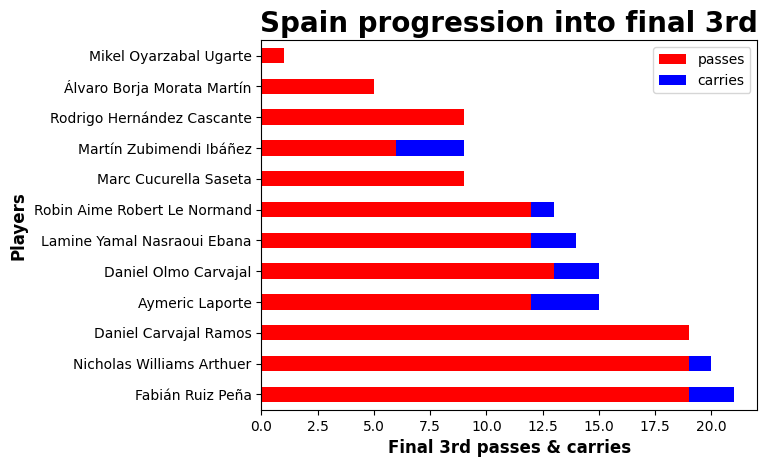

In [133]:
barchart_df = progressions_df[['player','passes','carries']]
barchart_df.set_index('player').plot(kind='barh',color = ['r','b'], legend = True, stacked = True)
plt.ylabel('Players',fontdict={'fontsize': 12, 'weight': 'semibold'})
plt.xlabel('Final 3rd passes & carries',fontdict={'fontsize': 12, 'weight': 'semibold'})
plt.title(f'{team} progression into final 3rd', fontdict={'fontsize':20,'weight':'bold'})

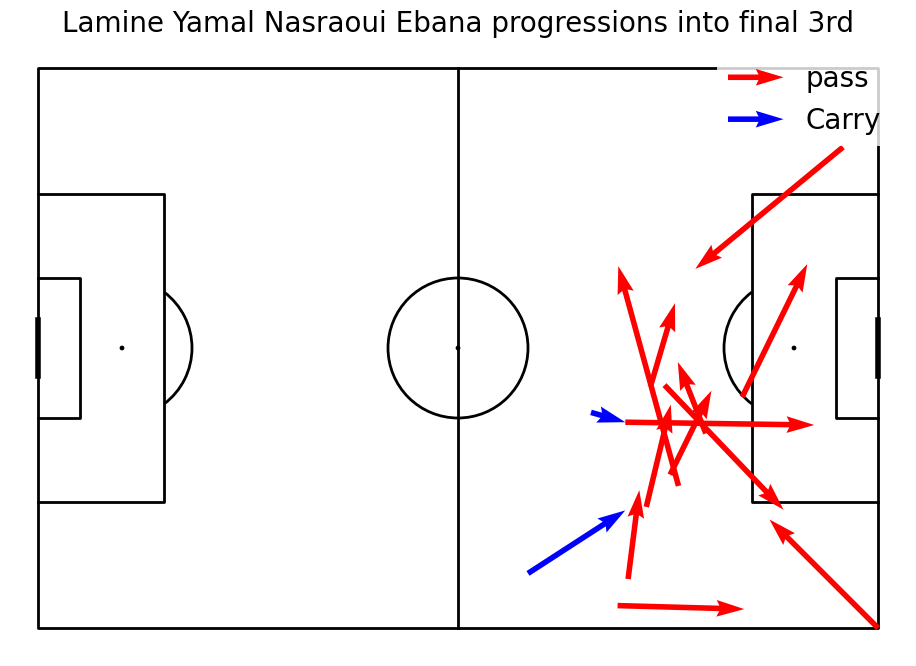

In [146]:
#for a given player final 3rd progression
player_name = 'Lamine Yamal Nasraoui Ebana'
player_passes = f3rd_passes[(f3rd_passes.player==player_name)]
player_carries  =f3rd_carries[(f3rd_carries.player==player_name)]

pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(13.5, 8),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

pitch.arrows(player_passes.x, player_passes.y,
             player_passes.pass_end_x, player_passes.pass_end_y, color='r', ax=ax, zorder=2, label = "pass")

pitch.arrows(player_carries.x, player_carries.y, 
             player_carries.carry_end_x, player_carries.carry_end_y, color='b', ax=ax, zorder=2, label = "Carry")

ax.legend(facecolor='white', edgecolor='None', fontsize=20)

ax_title = ax.set_title(f'{player_name} progressions into final 3rd',fontsize = 20)

# Comparing Touch/Heat Maps

In [179]:
player1 = 'Marc Cucurella Saseta'
player2 = 'Daniel Carvajal Ramos'
touches = ['Pass', 'Ball Receipt*', 'Carry', 'Clearance', 'Foul Won', 'Block',
           'Ball Recovery', 'Duel', 'Dribble', 'Interception', 'Miscontrol', 'Shot']

In [181]:
player1_df = event_df[(event_df.player==player1)&(event_df.type.isin(touches))]
player2_df = event_df[(event_df.player==player2)&(event_df.type.isin(touches))]

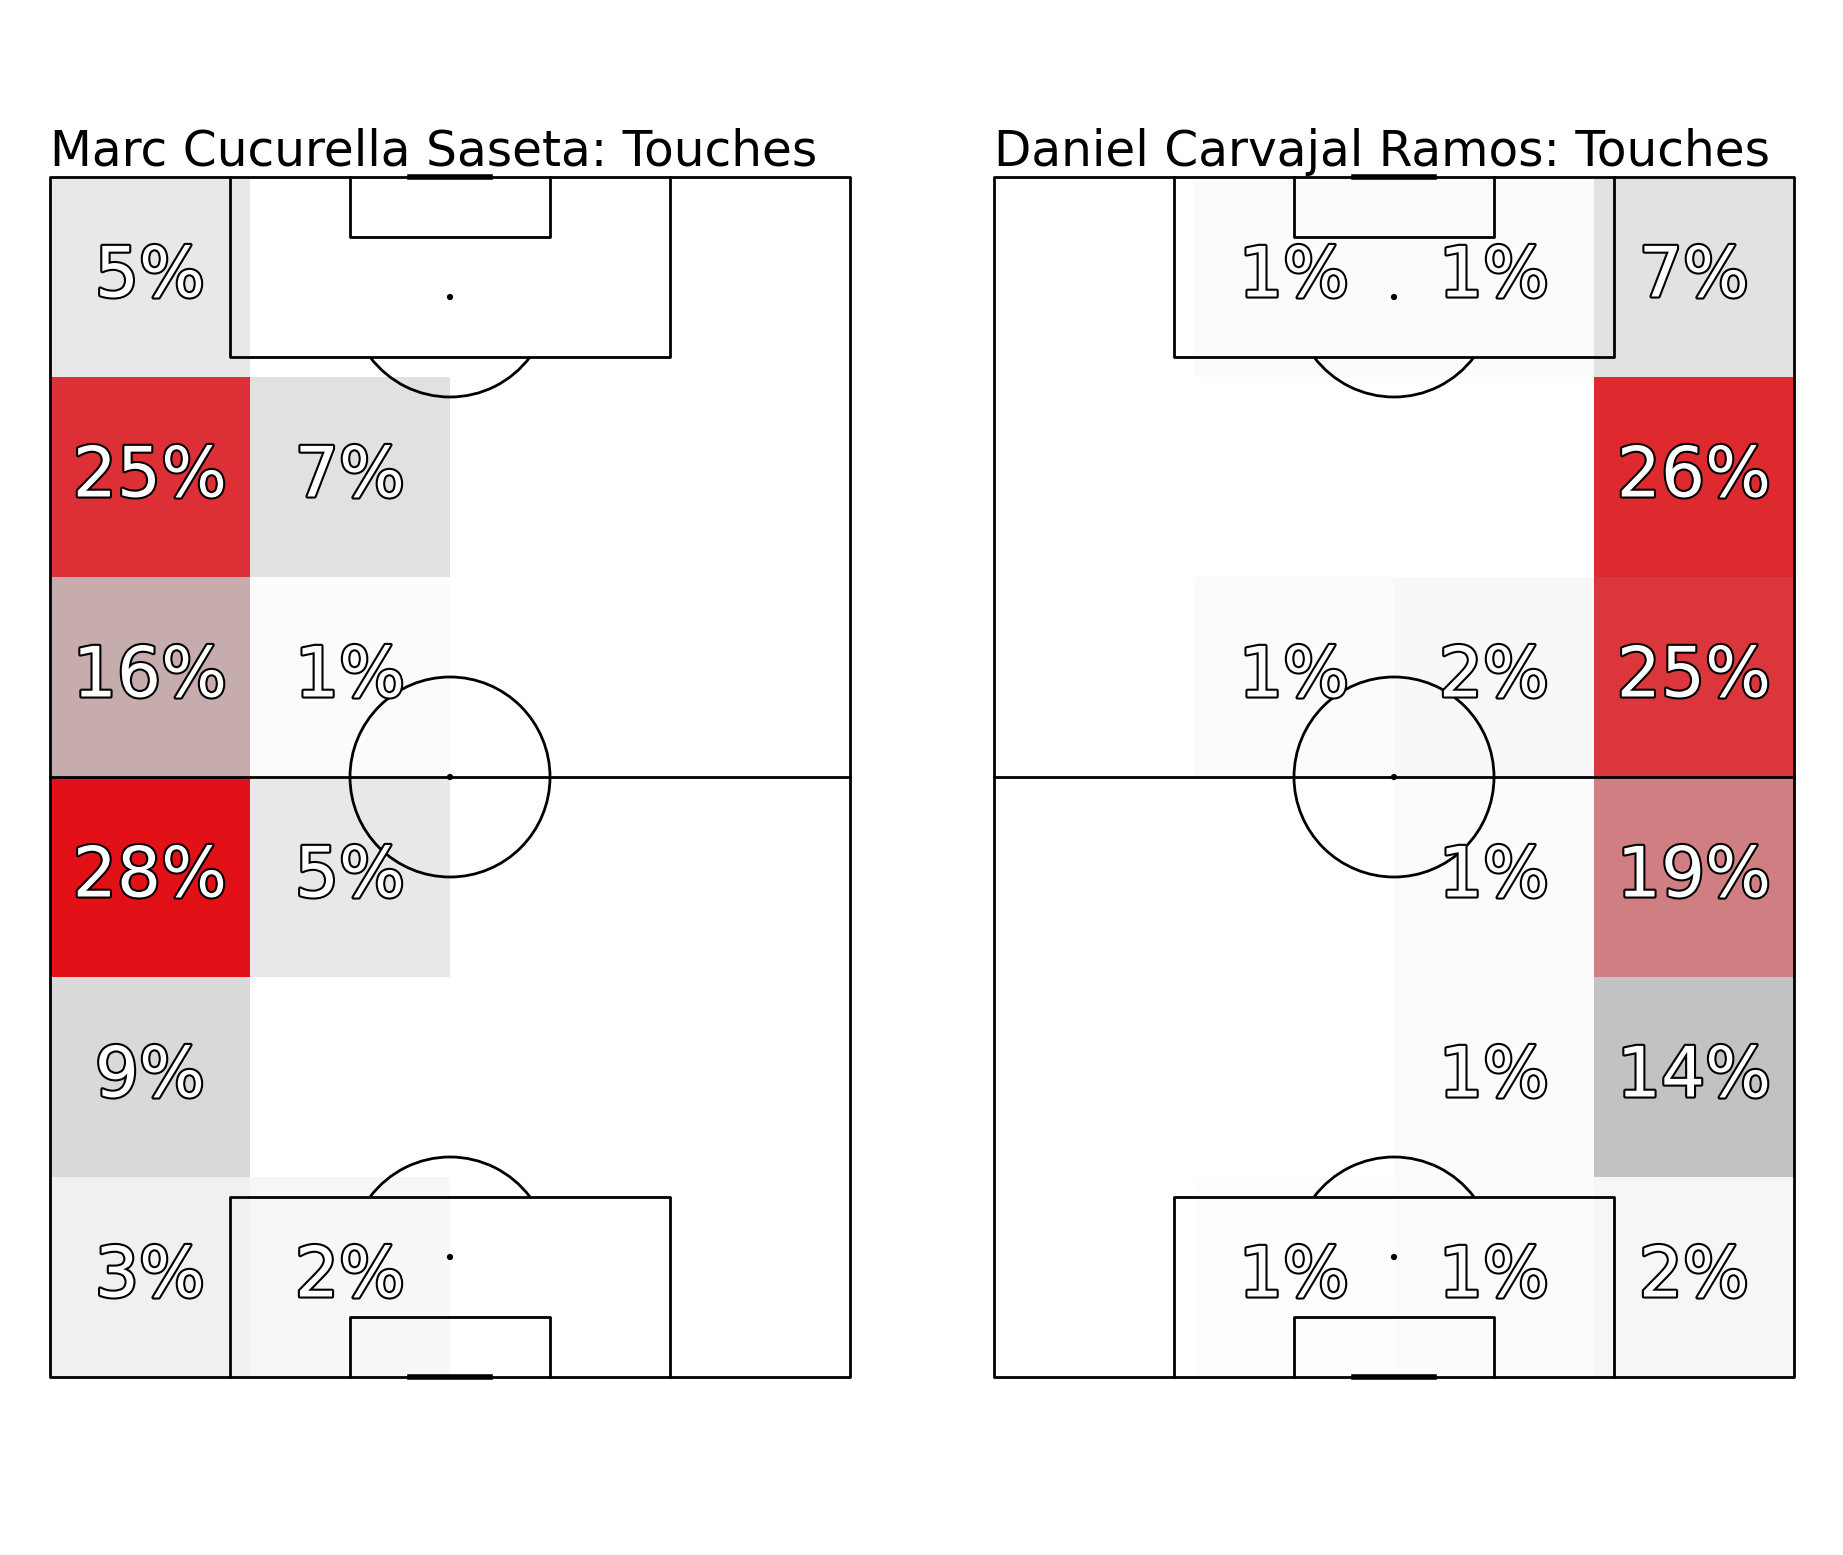

In [202]:
#colour map
colour1="white"
colour2="#c3c3c3"
colour3="#e21017"
cmaplist = [colour1, colour2, colour3]
cmap = LinearSegmentedColormap.from_list("", cmaplist)
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

#a grid of pitches
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color='#000000', linewidth=2,half=False)
fig, axs = pitch.grid(nrows=1, ncols=2
                      ,figheight=16,
                      grid_width=0.65,
                      endnote_height=0.03, endnote_space=0.05,
                      axis=False,title_space=0.02, title_height=0.06, grid_height=0.8)

#data for heatmap
bin_statistic1 = pitch.bin_statistic(player1_df.x, player1_df.y, statistic='count',
bins=(6, 4),normalize=True)
bin_statistic2 = pitch.bin_statistic(player2_df.x, player2_df.y, statistic='count',
bins=(6, 4),normalize=True)

#we want both our heatmaps to use the same colour spectrum
vmax1=bin_statistic1['statistic'].max()
vmax2=bin_statistic2['statistic'].max()
if vmax1>vmax2:
  vmax=vmax1
else:
  vmax=vmax2
vmin=0

heatmap1 = pitch.heatmap(bin_statistic1, ax=axs['pitch'][0], cmap=cmap, vmax=vmax, vmin=vmin)
#percentages for each zone
annotate1 = pitch.label_heatmap(bin_statistic1, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][0],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)
ax_text(0, 125, f'{player1}: Touches', c='black', fontsize=35,ax=axs['pitch'][0])

heatmap2 = pitch.heatmap(bin_statistic2, ax=axs['pitch'][1], cmap=cmap, vmax=vmax, vmin=vmin)
#percentages for each zone
annotate2 = pitch.label_heatmap(bin_statistic2, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][1],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

ax_text(0, 125, f'{player2}: Touches', c='black', fontsize=35,ax=axs['pitch'][1])

# Spain shots map

In [230]:
spain_shots = event_df[(event_df.type=='Shot')&(event_df.team==team)]
spain_goals = event_df[(event_df.type=='Shot')&(event_df.team==team)&(event_df.shot_outcome=='Goal')]

In [256]:
shot_count = spain_shots.groupby('player').size().reset_index()
shot_count.rename(columns={shot_count.columns[1]: "shots" }, inplace = True)
shot_count

,player,shots
0,Aymeric Laporte,1
1,Daniel Olmo Carvajal,2
2,Fabián Ruiz Peña,2
3,Lamine Yamal Nasraoui Ebana,2
4,Mikel Oyarzabal Ugarte,2
5,Nicholas Williams Arthuer,3
6,Robin Aime Robert Le Normand,1
7,Álvaro Borja Morata Martín,3


In [257]:
goals_count= spain_goals.groupby('player').size().reset_index()
goals_count.rename(columns={goals_count.columns[1]: "goals" }, inplace = True)
goals_count

,player,goals
0,Mikel Oyarzabal Ugarte,1
1,Nicholas Williams Arthuer,1


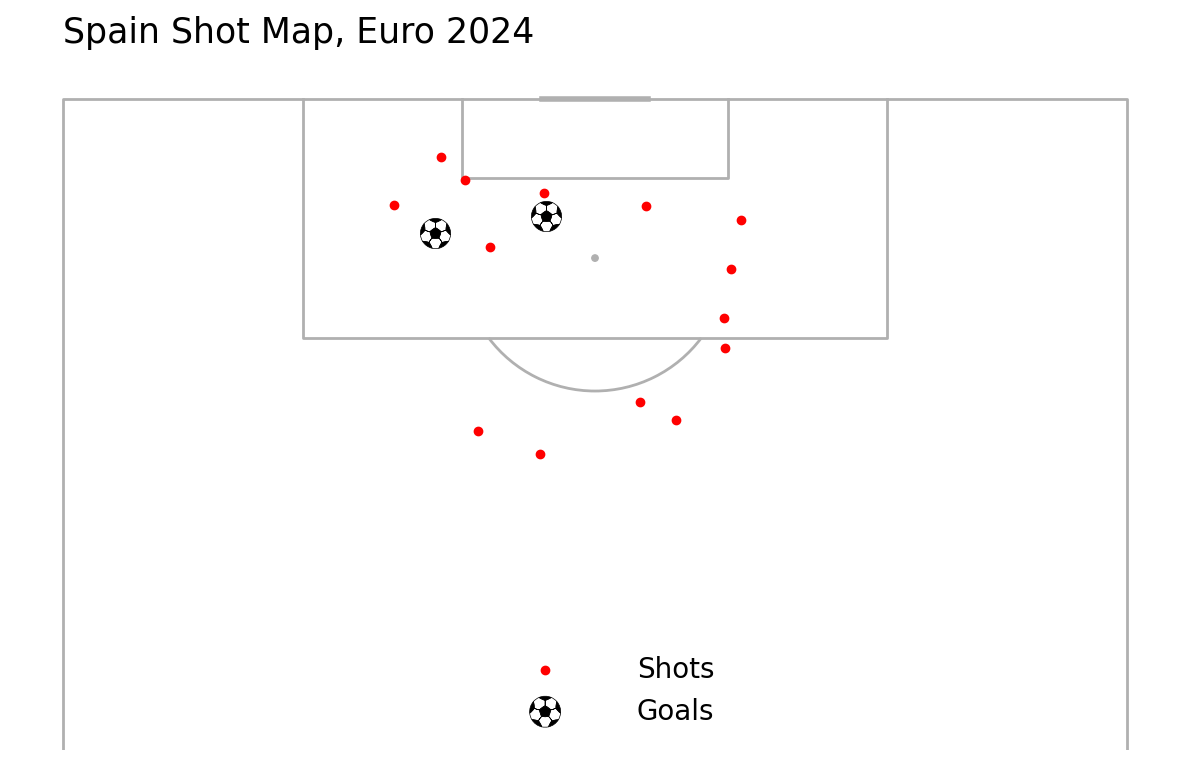

In [261]:
pitch = VerticalPitch(pitch_type='statsbomb',half=True,pad_bottom=-11)
fig, ax = pitch.draw(figsize=(12, 10))
shots = pitch.scatter(spain_shots.x, spain_shots.y,color='r',label='Shots',ax=ax)
goals = pitch.scatter(spain_goals.x, spain_goals.y,c='w',label='Goals',marker='football',ax=ax)
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')
ax_text(0, 125, f'Spain Shot Map, Euro 2024', ha='left', c='black',va='center', fontsize=25,ax=ax)